**First we will check the GPU**

In [1]:
!nvidia-smi

Fri Apr 26 00:53:19 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   46C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

# Install needed libraries

In [2]:
!pip install ultralytics

# Imports

In [3]:
import os
import cv2
from IPython.display import display,Image
from IPython import display
display.clear_output()
from ultralytics import YOLO


# Load the dataset

we will do that by roboflow

In [4]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="JTUctzw9bONEOVa92oUi")
project = rf.workspace("biac").project("hands-8vgfi")
version = project.version(1)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.2.2, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to Hands-1 in yolov8:: 100%|██████████| 5022/5022 [00:01<00:00, 3424.59it/s]


# Load the model and training

In [5]:
model = YOLO("yolov8n-seg.pt")

model.train(data="/content/Hands-1/data.yaml", epochs=60)  # train the model

100%|██████████| 6.73M/6.73M [00:00<00:00, 127MB/s]


Ultralytics YOLOv8.2.2 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=yolov8n-seg.pt, data=/content/Hands-1/data.yaml, epochs=60, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, s

100%|██████████| 755k/755k [00:00<00:00, 22.4MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 6.23M/6.23M [00:00<00:00, 113MB/s]


AMP: checks passed ✅


train: Scanning /content/Hands-1/train/labels... 2289 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2289/2289 [00:01<00:00, 1373.10it/s]

train: WARNING ⚠️ /content/Hands-1/train/images/IMG_20240323_103950_jpg.rf.37491925497adb773219d41e22819c97.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/Hands-1/train/images/IMG_20240323_103950_jpg.rf.92e4faadd1f630b9e1f59c0dc71ae9b4.jpg: 1 duplicate labels removed
train: WARNING ⚠️ /content/Hands-1/train/images/IMG_20240323_103950_jpg.rf.a3e6cce819660c4636b44bd873662c45.jpg: 1 duplicate labels removed
train: New cache created: /content/Hands-1/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
val: Scanning /content/Hands-1/valid/labels... 117 images, 0 backgrounds, 0 corrupt: 100%|██████████| 117/117 [00:00<00:00, 646.38it/s]

val: New cache created: /content/Hands-1/valid/labels.cache


Plotting labels to runs/segment/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 66 weight(decay=0.0), 77 weight(decay=0.0005), 76 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/segment/train
Starting training for 60 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       1/60      3.05G     0.6589     0.9496      1.253      1.184          4        640: 100%|██████████| 144/144 [01:04<00:00,  2.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  2.00it/s]

                   all        117        117      0.863      0.974      0.956      0.725      0.863      0.974      0.957      0.762



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       2/60      2.67G     0.6975     0.8347     0.8559      1.185          2        640: 100%|██████████| 144/144 [00:58<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.72it/s]

                   all        117        117      0.917      0.983      0.988      0.743       0.94      0.949      0.987      0.714



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       3/60       2.7G     0.7262     0.8433     0.7582      1.198          4        640: 100%|██████████| 144/144 [00:55<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.38it/s]

                   all        117        117      0.883      0.907      0.931       0.56      0.917      0.941       0.96      0.696



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       4/60      2.69G     0.7053     0.8043     0.6607      1.183          2        640: 100%|██████████| 144/144 [00:57<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.46it/s]

                   all        117        117      0.929      0.923      0.978      0.684      0.937      0.932      0.981      0.727



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       5/60      2.81G     0.6408      0.797     0.5796      1.143          2        640: 100%|██████████| 144/144 [00:58<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.44it/s]

                   all        117        117      0.983      0.966      0.994      0.831      0.975      0.991      0.994      0.877



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       6/60      2.72G     0.6259     0.7328     0.5376       1.13          3        640: 100%|██████████| 144/144 [00:57<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.20it/s]

                   all        117        117          1      0.999      0.995      0.839          1      0.999      0.995      0.872



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       7/60      2.83G     0.5841     0.6971     0.5023      1.103          3        640: 100%|██████████| 144/144 [00:57<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.19it/s]

                   all        117        117          1      0.997      0.995       0.87      0.998      0.983      0.995       0.88



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       8/60      2.81G     0.5643     0.7436      0.491      1.088          1        640: 100%|██████████| 144/144 [00:58<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.49it/s]

                   all        117        117      0.989          1      0.995      0.879      0.989          1      0.995      0.899



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


       9/60      2.68G     0.5498     0.6854     0.4723       1.08          1        640: 100%|██████████| 144/144 [00:56<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.20it/s]

                   all        117        117      0.981      0.991      0.994      0.875      0.981      0.991      0.994      0.904



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      10/60      2.68G     0.5468     0.6944     0.4635      1.085          1        640: 100%|██████████| 144/144 [00:57<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.16it/s]

                   all        117        117      0.991      0.994      0.995      0.868      0.991      0.994      0.995      0.912



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      11/60      2.81G     0.5331     0.6359     0.4472       1.07          2        640: 100%|██████████| 144/144 [00:57<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.60it/s]

                   all        117        117          1      0.999      0.995      0.862          1      0.999      0.995      0.902



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      12/60      2.67G     0.5104      0.654     0.4313      1.051          3        640: 100%|██████████| 144/144 [00:57<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.37it/s]

                   all        117        117      0.997          1      0.995      0.896      0.997          1      0.995       0.92



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      13/60      2.69G     0.5047     0.6621     0.4255       1.05          4        640: 100%|██████████| 144/144 [00:56<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.16it/s]

                   all        117        117      0.993      0.974      0.994      0.879      0.993      0.974      0.994      0.886



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      14/60       2.7G     0.5056     0.6115     0.4103      1.061          1        640: 100%|██████████| 144/144 [00:59<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.22it/s]

                   all        117        117      0.973      0.991      0.994      0.854      0.981          1      0.994      0.886



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      15/60      2.81G     0.5105     0.6506     0.4095      1.055          2        640: 100%|██████████| 144/144 [00:57<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.80it/s]

                   all        117        117      0.991          1      0.995      0.903      0.991          1      0.995       0.92



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      16/60      2.69G     0.4849     0.6156     0.3936      1.038          2        640: 100%|██████████| 144/144 [00:57<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.45it/s]

                   all        117        117       0.98          1      0.994       0.88       0.98          1      0.994       0.91



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      17/60      2.81G     0.4765       0.62     0.3877      1.033          4        640: 100%|██████████| 144/144 [00:59<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.39it/s]

                   all        117        117      0.989          1      0.995      0.897      0.989          1      0.995      0.913



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      18/60      2.69G     0.4702     0.6189     0.3808      1.032          3        640: 100%|██████████| 144/144 [00:59<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.21it/s]

                   all        117        117      0.991      0.991      0.994      0.912      0.991      0.991      0.994      0.913



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      19/60      2.83G     0.4997     0.6841      0.405      1.054          2        640: 100%|██████████| 144/144 [00:56<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.33it/s]

                   all        117        117      0.999          1      0.995      0.894      0.999          1      0.995      0.927



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      20/60      2.65G     0.4768      0.592     0.3842      1.045          1        640: 100%|██████████| 144/144 [00:57<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.35it/s]

                   all        117        117      0.999          1      0.995      0.906      0.999          1      0.995      0.932



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      21/60      2.71G     0.4641      0.594     0.3672      1.024          3        640: 100%|██████████| 144/144 [00:56<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.86it/s]

                   all        117        117          1          1      0.995      0.913          1          1      0.995      0.922



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      22/60      2.69G     0.4461     0.5781      0.354      1.015          4        640: 100%|██████████| 144/144 [00:56<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.39it/s]

                   all        117        117      0.999          1      0.995      0.917      0.999          1      0.995       0.93



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      23/60      2.83G     0.4444     0.5914     0.3491      1.019          1        640: 100%|██████████| 144/144 [00:57<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all        117        117      0.992          1      0.995       0.91      0.992          1      0.995      0.926



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      24/60      2.69G     0.4436     0.5567     0.3479      1.012          2        640: 100%|██████████| 144/144 [00:59<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.49it/s]

                   all        117        117      0.988          1      0.995      0.906      0.988          1      0.995      0.929



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      25/60      2.81G      0.443     0.5726     0.3424       1.01          3        640: 100%|██████████| 144/144 [00:57<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.21it/s]

                   all        117        117      0.991          1      0.995      0.921      0.991          1      0.995      0.926



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      26/60      2.81G     0.4291     0.5669     0.3401      1.006          1        640: 100%|██████████| 144/144 [00:57<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.47it/s]

                   all        117        117      0.999          1      0.995      0.929      0.999          1      0.995       0.93



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      27/60      2.69G     0.4369     0.5688     0.3453      1.009          4        640: 100%|██████████| 144/144 [00:58<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.25it/s]

                   all        117        117      0.999          1      0.995      0.931      0.999          1      0.995      0.931



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      28/60      2.68G     0.4244     0.5617     0.3348      1.007          1        640: 100%|██████████| 144/144 [00:58<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.57it/s]

                   all        117        117      0.999          1      0.995      0.931      0.999          1      0.995      0.934



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      29/60      2.71G     0.4156      0.538     0.3229      1.001          4        640: 100%|██████████| 144/144 [00:58<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.42it/s]

                   all        117        117      0.999          1      0.995      0.924      0.999          1      0.995      0.935



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      30/60      2.69G     0.4092     0.5475     0.3147          1          4        640: 100%|██████████| 144/144 [00:58<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.12it/s]

                   all        117        117          1      0.998      0.995      0.924          1      0.998      0.995      0.931



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      31/60      2.81G     0.4103     0.5556     0.3215     0.9979          3        640: 100%|██████████| 144/144 [00:58<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.46it/s]

                   all        117        117      0.997          1      0.995      0.931      0.997          1      0.995      0.933



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      32/60      2.67G     0.4007     0.5266     0.3132      0.995          2        640: 100%|██████████| 144/144 [00:57<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.64it/s]

                   all        117        117      0.991          1      0.995      0.934      0.991          1      0.995      0.939



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      33/60      2.69G     0.3942     0.5298      0.309     0.9818          4        640: 100%|██████████| 144/144 [00:57<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.20it/s]

                   all        117        117      0.989          1      0.995      0.938      0.989          1      0.995      0.935



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      34/60      2.69G     0.4015       0.54     0.3022     0.9898          2        640: 100%|██████████| 144/144 [01:00<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.18it/s]

                   all        117        117      0.999          1      0.995      0.935      0.999          1      0.995      0.937



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      35/60      2.68G     0.3937     0.5425     0.3109     0.9857          1        640: 100%|██████████| 144/144 [00:56<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.01it/s]

                   all        117        117      0.999          1      0.995      0.929      0.999          1      0.995      0.939



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      36/60      2.83G     0.3705     0.5057     0.2905     0.9738          2        640: 100%|██████████| 144/144 [00:55<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.13it/s]

                   all        117        117      0.997          1      0.995      0.941      0.997          1      0.995      0.941



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      37/60      2.81G     0.3937     0.5048     0.2982     0.9863          2        640: 100%|██████████| 144/144 [00:57<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.85it/s]

                   all        117        117      0.999          1      0.995      0.934      0.999          1      0.995      0.936



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      38/60      2.72G     0.3788     0.5181     0.2987     0.9765          1        640: 100%|██████████| 144/144 [00:56<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.31it/s]

                   all        117        117      0.991          1      0.995      0.937      0.991          1      0.995      0.936



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      39/60       2.7G     0.3701     0.5118     0.2803      0.972          1        640: 100%|██████████| 144/144 [00:57<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.06it/s]

                   all        117        117      0.999          1      0.995      0.941      0.999          1      0.995      0.951



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      40/60      2.83G     0.3777     0.5132     0.2998     0.9813          1        640: 100%|██████████| 144/144 [00:56<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.39it/s]

                   all        117        117      0.999          1      0.995      0.941      0.999          1      0.995      0.942



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      41/60      2.69G     0.3702      0.503     0.2719     0.9665          2        640: 100%|██████████| 144/144 [00:55<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.54it/s]

                   all        117        117      0.997          1      0.995      0.954      0.997          1      0.995      0.946



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      42/60       2.7G     0.3683     0.5021     0.2781     0.9708          1        640: 100%|██████████| 144/144 [00:55<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.67it/s]

                   all        117        117      0.998          1      0.995      0.946      0.998          1      0.995      0.946



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      43/60      2.69G     0.3682     0.5109     0.2774     0.9665          2        640: 100%|██████████| 144/144 [00:55<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.30it/s]

                   all        117        117      0.999          1      0.995      0.925      0.999          1      0.995      0.944



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      44/60      2.67G     0.3447      0.479     0.2606     0.9556          2        640: 100%|██████████| 144/144 [00:56<00:00,  2.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.38it/s]

                   all        117        117      0.999          1      0.995      0.948      0.999          1      0.995      0.955



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      45/60      2.72G     0.3512       0.48     0.2581     0.9563          1        640: 100%|██████████| 144/144 [00:55<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.12it/s]

                   all        117        117      0.999          1      0.995      0.945      0.999          1      0.995      0.951



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      46/60      2.71G     0.3475     0.4723      0.261     0.9568          4        640: 100%|██████████| 144/144 [00:55<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.25it/s]

                   all        117        117      0.999          1      0.995      0.945      0.999          1      0.995      0.952



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      47/60      2.69G     0.3423     0.4901      0.261     0.9543          4        640: 100%|██████████| 144/144 [00:56<00:00,  2.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.32it/s]

                   all        117        117      0.991          1      0.995      0.939      0.991          1      0.995      0.949



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      48/60      2.69G     0.3487     0.4804     0.2568     0.9573          2        640: 100%|██████████| 144/144 [00:55<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.81it/s]

                   all        117        117      0.999          1      0.995      0.954      0.999          1      0.995      0.953



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      49/60      2.83G     0.3526     0.4798     0.2609     0.9621          2        640: 100%|██████████| 144/144 [00:55<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.39it/s]

                   all        117        117      0.991          1      0.995      0.943      0.991          1      0.995      0.948



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      50/60      2.67G     0.3364     0.4744      0.247     0.9506          4        640: 100%|██████████| 144/144 [00:55<00:00,  2.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.45it/s]

                   all        117        117      0.998          1      0.995      0.946      0.998          1      0.995      0.949


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      51/60      2.79G     0.2502     0.3355     0.1944     0.9319          1        640: 100%|██████████| 144/144 [00:56<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.72it/s]

                   all        117        117      0.999          1      0.995      0.961      0.999          1      0.995      0.958



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      52/60      2.61G     0.2466      0.328     0.1877     0.9392          1        640: 100%|██████████| 144/144 [00:51<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.63it/s]

                   all        117        117      0.999          1      0.995      0.955      0.999          1      0.995      0.954



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      53/60      2.61G     0.2345     0.3202     0.1772     0.9241          1        640: 100%|██████████| 144/144 [00:52<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.73it/s]

                   all        117        117      0.999          1      0.995      0.963      0.999          1      0.995       0.96



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      54/60      2.61G     0.2339     0.3149     0.1766     0.9256          1        640: 100%|██████████| 144/144 [00:53<00:00,  2.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.71it/s]

                   all        117        117      0.999          1      0.995      0.958      0.999          1      0.995      0.956



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      55/60      2.61G     0.2196     0.3122     0.1671     0.9085          1        640: 100%|██████████| 144/144 [00:52<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.54it/s]

                   all        117        117      0.999          1      0.995      0.959      0.999          1      0.995      0.957



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      56/60      2.61G     0.2174     0.3095     0.1624     0.9107          1        640: 100%|██████████| 144/144 [00:51<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.75it/s]

                   all        117        117      0.999          1      0.995      0.962      0.999          1      0.995      0.956



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      57/60      2.61G      0.208     0.3147     0.1596        0.9          1        640: 100%|██████████| 144/144 [00:51<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.23it/s]

                   all        117        117      0.999          1      0.995      0.967      0.999          1      0.995      0.961



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      58/60      2.61G     0.2048     0.3091     0.1568     0.8965          1        640: 100%|██████████| 144/144 [00:53<00:00,  2.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.73it/s]

                   all        117        117      0.999          1      0.995      0.962      0.999          1      0.995      0.959



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      59/60      2.61G     0.2009     0.3027     0.1538     0.8935          1        640: 100%|██████████| 144/144 [00:52<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.69it/s]

                   all        117        117      0.998          1      0.995      0.966      0.998          1      0.995       0.96



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      60/60      2.61G     0.2008     0.3259     0.1559     0.8936          1        640: 100%|██████████| 144/144 [00:51<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.70it/s]

                   all        117        117      0.999          1      0.995      0.965      0.999          1      0.995       0.96



60 epochs completed in 0.990 hours.
Optimizer stripped from runs/segment/train/weights/last.pt, 6.8MB
Optimizer stripped from runs/segment/train/weights/best.pt, 6.8MB

Validating runs/segment/train/weights/best.pt...
Ultralytics YOLOv8.2.2 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-seg summary (fused): 195 layers, 3258259 parameters, 0 gradients, 12.0 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:04<00:00,  1.15s/it]


                   all        117        117      0.999          1      0.995      0.967      0.999          1      0.995      0.961
Speed: 0.2ms preprocess, 3.8ms inference, 0.0ms loss, 7.3ms postprocess per image
Results saved to runs/segment/train


ultralytics.utils.metrics.SegmentMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x797de8f2d840>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)', 'Precision-Recall(M)', 'F1-Confidence(M)', 'Precision-Confidence(M)', 'Recall-Confidence(M)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041, 

# Validation

In [6]:
# Validate the model
metrics = model.val()  # no arguments needed, dataset and settings remembered
metrics.box.map    # map50-95
metrics.box.map50  # map50
metrics.box.map75  # map75
metrics.box.maps   # a list contains map50-95 of each category

Ultralytics YOLOv8.2.2 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-seg summary (fused): 195 layers, 3258259 parameters, 0 gradients, 12.0 GFLOPs


val: Scanning /content/Hands-1/valid/labels.cache... 117 images, 0 backgrounds, 0 corrupt: 100%|██████████| 117/117 [00:00<?, ?it/s]
os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:08<00:00,  1.03s/it]


                   all        117        117      0.999          1      0.995      0.967      0.999          1      0.995      0.961
Speed: 1.1ms preprocess, 16.7ms inference, 0.0ms loss, 9.0ms postprocess per image
Results saved to runs/segment/train2


array([    0.96679])

# Testing

In [8]:
from PIL import Image

# Load the image
image = Image.open("/content/Hands-1/test/images/IMG20240326114048_jpg.rf.88bc6e12a9e9cc1f6fee38760f092974.jpg")

# Make a prediction
prediction = model.predict(image)

# Save the prediction
prediction[0].save("prediction.jpg")


0: 640x640 1 hand, 23.7ms
Speed: 2.1ms preprocess, 23.7ms inference, 19.6ms postprocess per image at shape (1, 3, 640, 640)


'prediction.jpg'

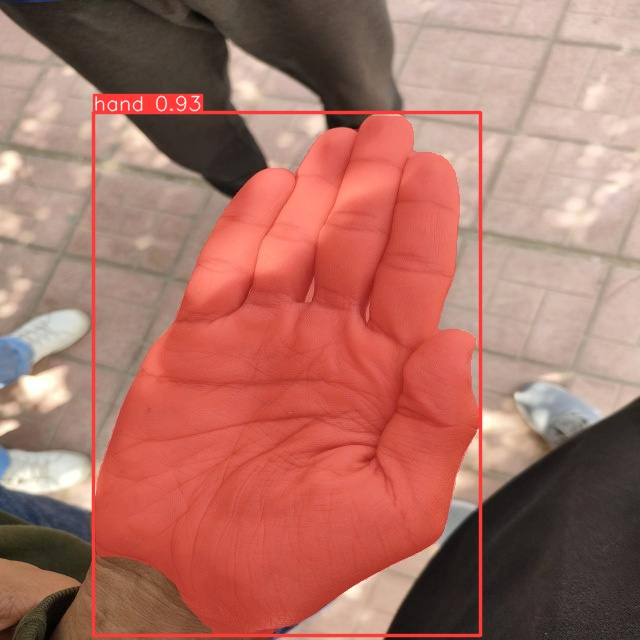

In [10]:
from IPython.display import Image

# display the image
Image(filename=f'/content/prediction.jpg',width=800)